# 01. Import libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Create a path to make it easier to import files
path = '/Users/Luca2/Documents/Dropbox/Mein Mac (Air-von-Luca.fritz.box)/Desktop/World Happiness Report'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged.csv'))

In [6]:
# Check if the right data is imported
df.head()

,Unnamed: 0,Country,Region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption
0,0,Finland,Western Europe,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,1,Norway,Western Europe,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2,Denmark,Western Europe,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,3,Iceland,Western Europe,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,4,Switzerland,Western Europe,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# 02. Create Subset

In [7]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Year', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom (Life Choices)', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [8]:
# Drop not needed columns 

df_sub = df.drop (['Unnamed: 0','Country', 'Region', 'Year'], axis = 1)

In [9]:
df_sub.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption
0,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# 03. Create Correlation Matrix Heatmap

In [10]:
# Create correlation table

df_sub.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption
Happiness Rank,1.000000,-0.982777,-0.717727,-0.655044,-0.644759,-0.573554,-0.024093,-0.399915
Happiness Score,-0.982777,1.000000,0.699087,0.657202,0.648975,0.584238,0.053904,0.421489
Economy (GDP per Capita),-0.717727,0.699087,1.000000,0.485851,0.469423,0.462430,-0.190374,0.364264
Social Support,-0.655044,0.657202,0.485851,1.000000,0.602171,0.312092,0.003625,0.146829
Health (Life Expectancy),-0.644759,0.648975,0.469423,0.602171,1.000000,0.219351,-0.001437,0.253227
Freedom (Life Choices),-0.573554,0.584238,0.462430,0.312092,0.219351,1.000000,0.169760,0.427449
Generosity,-0.024093,0.053904,-0.190374,0.003625,-0.001437,0.169760,1.000000,0.193676
Perceptions of Corruption,-0.399915,0.421489,0.364264,0.146829,0.253227,0.427449,0.193676,1.000000


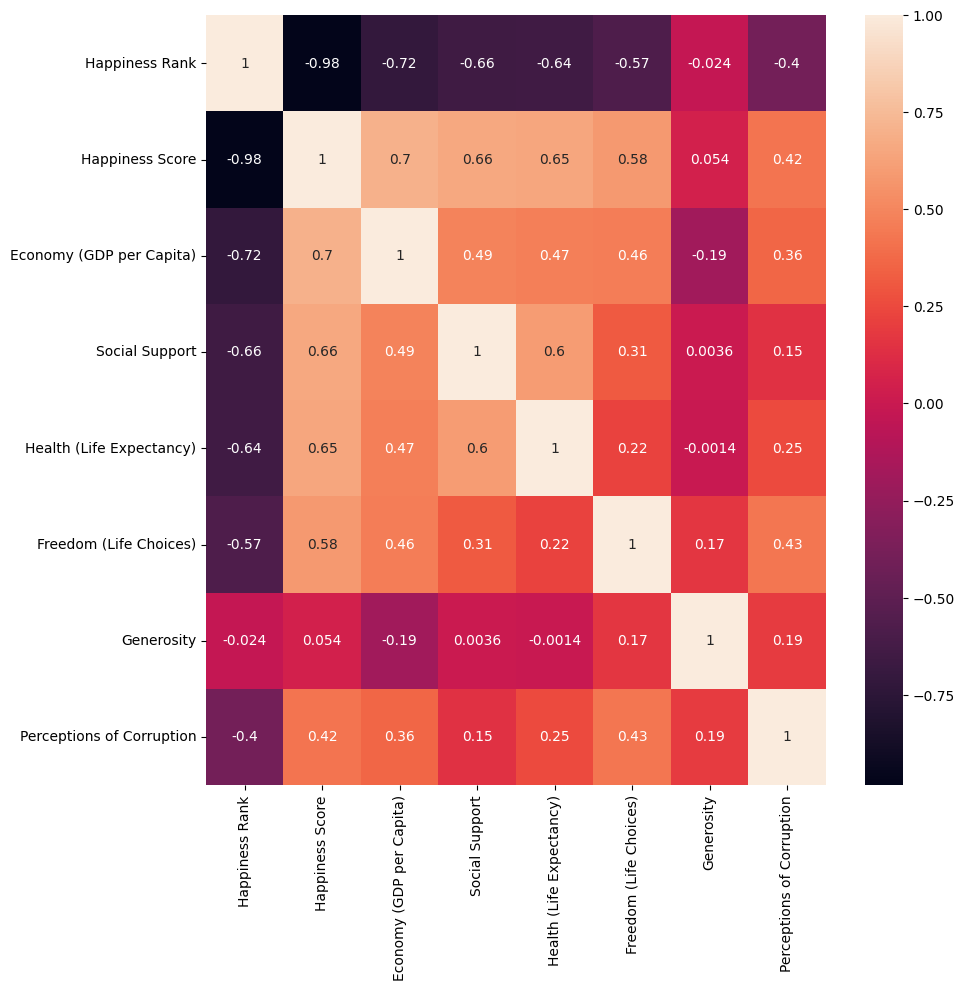

In [11]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

## Discussion:

### There is an almost perfect negative correlation between the Happiness Rank and the Happiness Score. The higher the Happiness Score the lower is the positional rank (1 being the best). It further observed that Economy, Social Support, Health and Freedom have a strong positive correlation (value over 0.5) with the Happiness Score. Perceptions of Corruption has a moderate positve correlation with the Happiness Score, while Generosity only has a weak positive correlation with the Happiness Score.

# 04. Create Scatterplot of most correlated variables

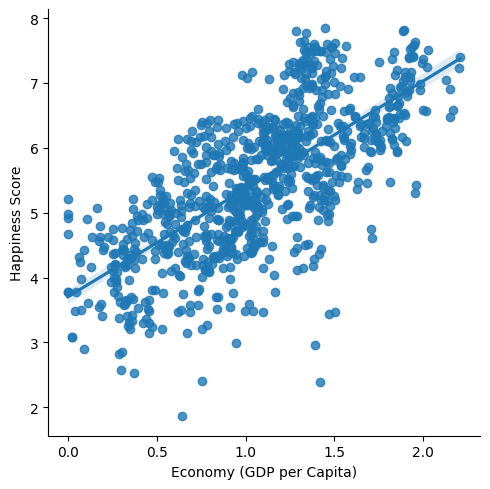

In [12]:
# Scatterplot of Economy and Happiness
sns.lmplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df)

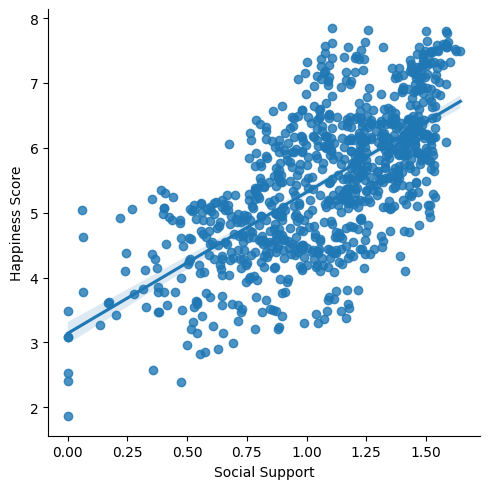

In [13]:
# Scatterplot of Social Support and Happiness
sns.lmplot(x = 'Social Support', y = 'Happiness Score', data = df)

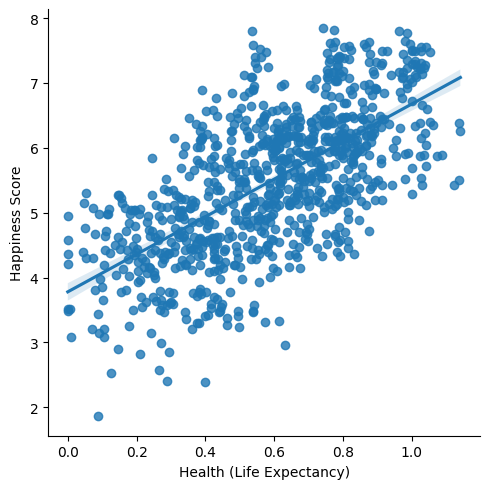

In [14]:
# Scatterplot of Health and Happiness
sns.lmplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df)

### Discussion: 

### All the scatterplots display the positive relationship between the specific variable and the Happiness Score. The way in which the individual data points align around the line does differ between the different scatteplots. The Social Support one for example can be described as being 'top-heavy' wit he majority of data points being clustered towards the top of the plot. It also looked like those data points are further away from the line than the data points of the Economy scatterplot.

# 05. Create Pair Plot

In [15]:
pair_plot = sns.pairplot(df)

## Discussion:

### Most of the plots exhibit a similar shape, characterized by a clear tilt in one direction. I will focus my analysis on the variables (Economy, Social Support, Health, and Freedom), as these appear to have the most significant impact on a country's happiness. Exploring these variables could provide insights into areas that countries may need to improve to improve the lives of their citizen. Additionally, I find scatterplots with less predictable shapes or clear outliers particularly interesting, even though they are not part of my project motivation. For instance, there are countries with a relatively high level of trust in their government's lack of corruption, yet they are nit happy (broadly speaking) simultaneously.

<Axes: xlabel='Happiness Score', ylabel='Count'>

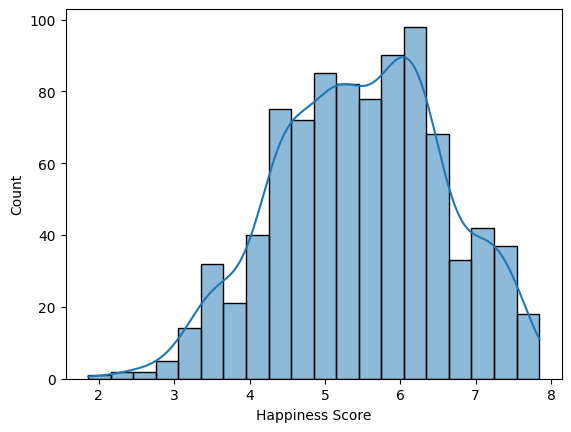

In [16]:
sns.histplot(df['Happiness Score'], bins = 20, kde = True)

In [17]:
# Convert 'Happiness Score' column to numeric type
df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')


# Create a categorical variable
df.loc[df_sub['Happiness Score'] <= 4.5, 'Happiness Category'] = 'Low Happiness'
df.loc[(df_sub['Happiness Score'] > 4.5) & (df['Happiness Score'] <= 6.5), 'Happiness Category'] = 'Average Happiness'
df.loc[df_sub['Happiness Score'] > 6.5, 'Happiness Category'] = 'High Happiness'


In [19]:
df['Happiness Category'].value_counts(dropna = False)

Average Happiness    567
Low Happiness        182
High Happiness       146
Name: Happiness Category, dtype: int64

In [20]:
# Check if the entries fit with the 895 rows of the dataframe 
567+182+146 

895

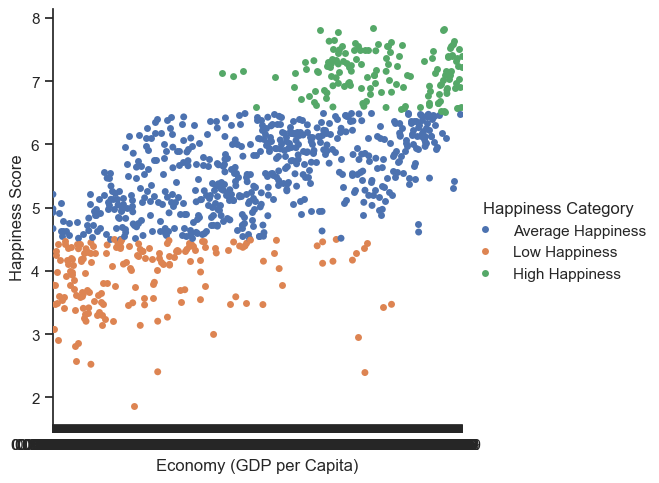

In [21]:
# Create categorical plot with Economy
sns.set(style= 'ticks')
cat_plot_Economy = sns.catplot(x='Economy (GDP per Capita)', y='Happiness Score', hue= 'Happiness Category', data=df)

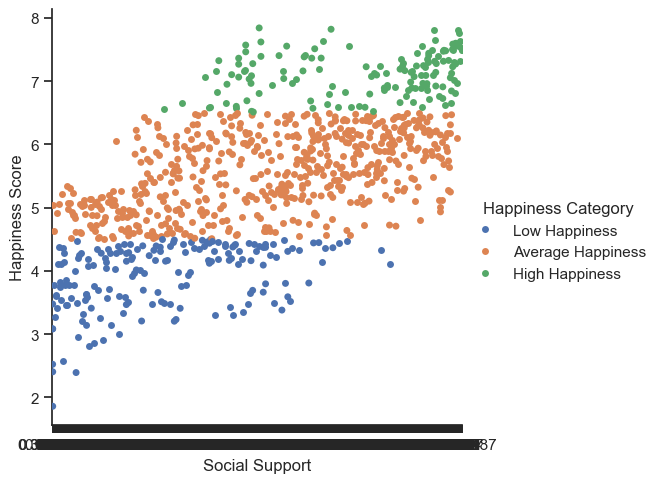

In [22]:
# Create categorical plot with Social Support 
sns.set(style= 'ticks')
cat_plot_Social = sns.catplot(x='Social Support', y='Happiness Score', hue= 'Happiness Category', data=df)

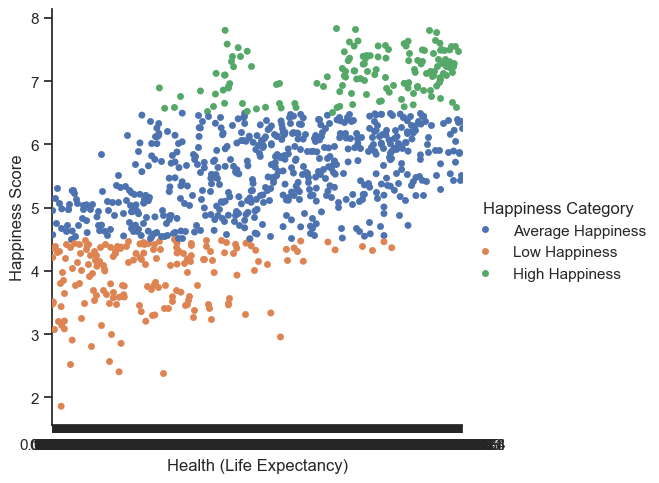

In [23]:
# Create categorical plot with Health
sns.set(style= 'ticks')
cat_plot_Social = sns.catplot(x='Health (Life Expectancy)', y='Happiness Score', hue= 'Happiness Category', data=df)

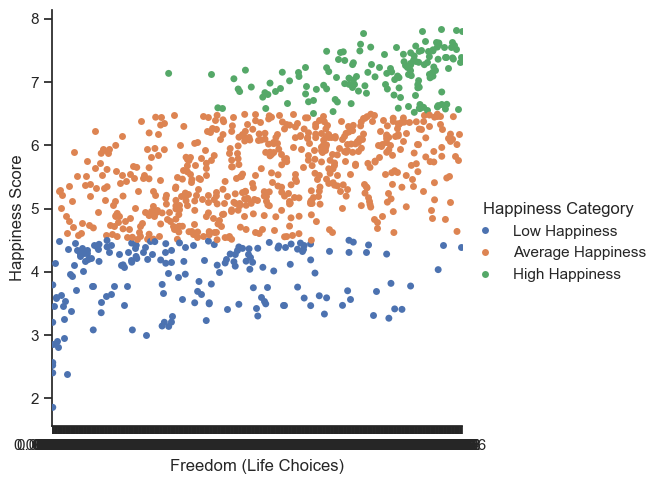

In [24]:
# Create categorical plot with Freedom
sns.set(style= 'ticks')
cat_plot_Social = sns.catplot(x='Freedom (Life Choices)', y='Happiness Score', hue= 'Happiness Category', data=df)

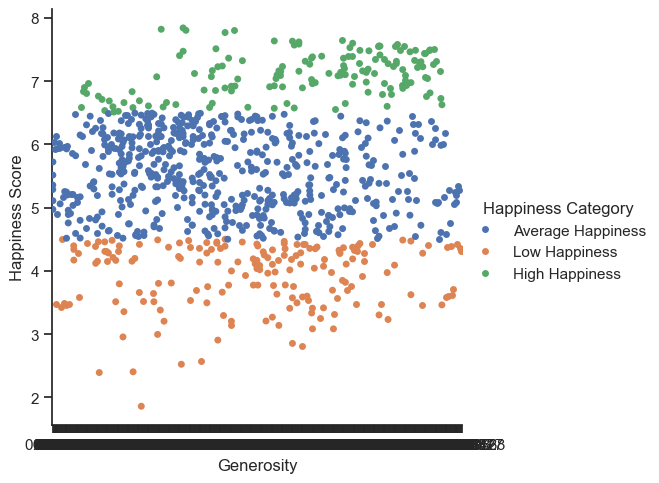

In [25]:
# Create categorical plot with Generosity
sns.set(style= 'ticks')
cat_plot_Social = sns.catplot(x='Generosity', y='Happiness Score', hue= 'Happiness Category', data=df)

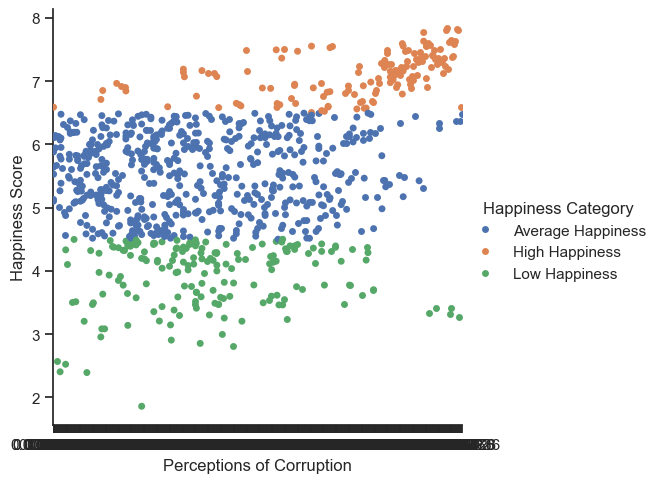

In [26]:
# Create categorical plot with Corruption
sns.set(style= 'ticks')
cat_plot_Social = sns.catplot(x='Perceptions of Corruption', y='Happiness Score', hue= 'Happiness Category', data=df)

## Discussion:

### Some differences can be observed among the graphs. Variables with a strong correlation exhibit a clear direction, while others are more stretched out. This is particularly pronounced in the case of 'Perceptions of Corruption,' where the graph does not reveal a clear direction. Additionally, individual categories behave differently. Entries with high happiness are prominently represented in the upper right in graphs with strong correlations, whereas high happiness values are distributed across the entire range of the 'Generosity' graph.

# 07 Questions 

## Is there a general difference between regions?

In [27]:
crosstab = pd.crosstab(df['Region'], df['Happiness Category'], dropna = False)

In [28]:
crosstab

Happiness Category,Average Happiness,High Happiness,Low Happiness
Region,,,
Central and Eastern Europe,92,10,0
Commonwealth of Independent States,65,0,4
East Asia,33,3,0
Latin America and Caribbean,111,7,4
Middle East and North Africa,63,14,24
North America and ANZ,0,24,0
South Asia,19,0,21
Southeast Asia,45,1,8
Sub-Saharan Africa,101,0,121


In [29]:
# Look at the distribution of the category within each region
percentage_distribution = crosstab.apply(lambda row: row / row.sum() * 100, axis=1)

In [30]:
percentage_distribution

Happiness Category,Average Happiness,High Happiness,Low Happiness
Region,,,
Central and Eastern Europe,90.196078,9.803922,0.000000
Commonwealth of Independent States,94.202899,0.000000,5.797101
East Asia,91.666667,8.333333,0.000000
Latin America and Caribbean,90.983607,5.737705,3.278689
Middle East and North Africa,62.376238,13.861386,23.762376
North America and ANZ,0.000000,100.000000,0.000000
South Asia,47.500000,0.000000,52.500000
Southeast Asia,83.333333,1.851852,14.814815
Sub-Saharan Africa,45.495495,0.000000,54.504505


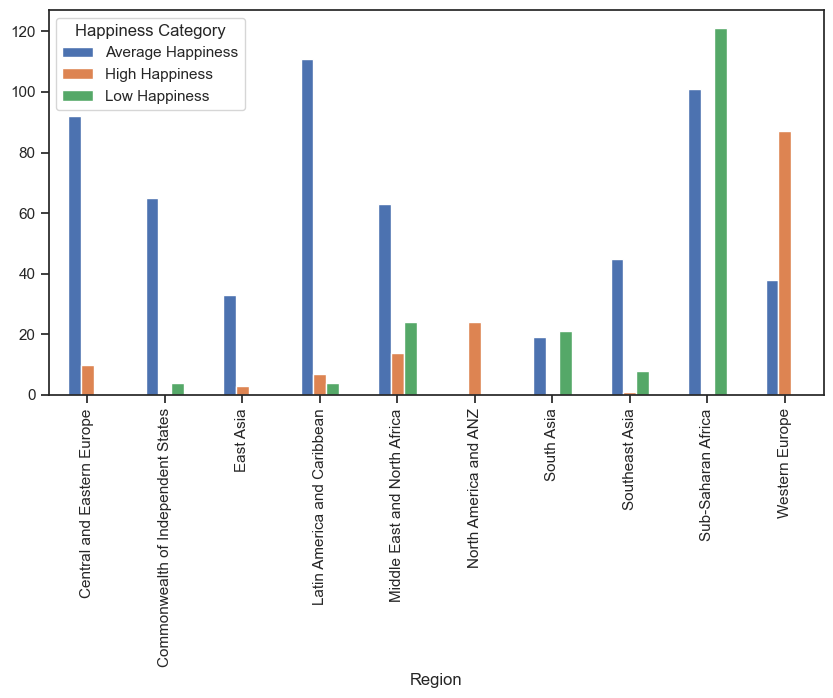

In [31]:
plot_bar = crosstab.plot.bar(figsize=[10,5])

### There is a clear difference between the regions. The happiest region in Europe is Western Europe, where 70% of the entries ( the combination of country and year) exhibit high levels of happiness. On the opposite end is Sub-Saharan Africa, where more than 50% of the entries are low in happiness. The distinction among African states is interesting. In future investigations, this could be examined more closely to understand how countries on the same continent can vary so significantly. It has to be noted that North Africa, in the current region classification, includes some Asian countries as well.

## What factors influence happiness the most?

In [32]:
df_sub.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption
Happiness Rank,1.000000,-0.982777,-0.717727,-0.655044,-0.644759,-0.573554,-0.024093,-0.399915
Happiness Score,-0.982777,1.000000,0.699087,0.657202,0.648975,0.584238,0.053904,0.421489
Economy (GDP per Capita),-0.717727,0.699087,1.000000,0.485851,0.469423,0.462430,-0.190374,0.364264
Social Support,-0.655044,0.657202,0.485851,1.000000,0.602171,0.312092,0.003625,0.146829
Health (Life Expectancy),-0.644759,0.648975,0.469423,0.602171,1.000000,0.219351,-0.001437,0.253227
Freedom (Life Choices),-0.573554,0.584238,0.462430,0.312092,0.219351,1.000000,0.169760,0.427449
Generosity,-0.024093,0.053904,-0.190374,0.003625,-0.001437,0.169760,1.000000,0.193676
Perceptions of Corruption,-0.399915,0.421489,0.364264,0.146829,0.253227,0.427449,0.193676,1.000000


### As discussed earlier, the factors of economy, social support, health, and also freedom seem to play a significant role in determining whether a country is happy or not. It is worth noting that correlation does not imply causation. In further steps, it can be explored to what extent each individual factor is responsible for happiness.

## Other Questions:

### For the other questions regarding the temporal trends, it would be better to address them using an interactive dashboard in Tableau. This approach would provide the best overview and allow tracking changes over the years.

# 08.Hypotheses

## I. Regional Divide of Happiness:

### Null Hypothesis : There is no significant difference in the average 'Happiness Score' among different regions.

### Alternative Hypothesis : There is a significant difference in the average 'Happiness Score' among different regions.

## II. Factors Influencing Happiness:

### Null Hypothesis: There is no significant relationship between the 'GDP per Capita', the 'Social Structure', and the 'Life Expectancy at birth' of a country and its 'Happiness Score'.

### Alternative Hypothesis: There is a significant relationship between the 'GDP per Capita', the 'Social Structure', and the 'Life Expectancy at birth' of a country and its 'Happiness Score'.

# 09. Export Data

In [33]:
df.to_csv(os.path.join (path, '02 Data', 'Prepared Data', 'df_merged_cleaned.csv'))